In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime


In [2]:
%matplotlib inline

In [3]:
df = pd.read_csv('workout_list.csv')

In [3]:
df.head()

,date,log_id,exercise_id,exercise_name,set_number,weight,rep
0,2016-03-04,1,2,Barbell Bench Press,1,150.0,10
1,2016-03-04,1,2,Barbell Bench Press,2,150.0,10
2,2016-03-04,1,2,Barbell Bench Press,3,150.0,10
3,2016-03-04,2,10,Barbell Shoulder Press,1,95.0,10
4,2016-03-04,2,10,Barbell Shoulder Press,2,85.0,10


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13098 entries, 0 to 13097
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           13098 non-null  object 
 1   log_id         13098 non-null  int64  
 2   exercise_id    13098 non-null  int64  
 3   exercise_name  13098 non-null  object 
 4   set_number     13098 non-null  int64  
 5   weight         13098 non-null  float64
 6   rep            13098 non-null  int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 716.4+ KB


In [9]:
df.isna().sum()

date             0
log_id           0
exercise_id      0
exercise_name    0
set_number       0
weight           0
rep              0
dtype: int64

In [10]:
df.describe()

,log_id,exercise_id,set_number,weight,rep
count,13098.000000,13098.000000,13098.000000,13098.000000,13098.000000
mean,2038.719805,134.556726,2.368835,140.519316,7.994961
std,1138.915254,174.019432,1.173606,90.188816,2.503226
min,1.000000,2.000000,1.000000,1.000000,0.000000
25%,1062.000000,12.000000,1.000000,55.000000,5.000000
50%,2064.500000,93.000000,2.000000,130.000000,10.000000
75%,3034.750000,159.000000,3.000000,210.000000,10.000000
max,3916.000000,954.000000,10.000000,405.000000,20.000000


In [4]:
df['date'] = pd.to_datetime(df['date'], yearfirst=True)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13098 entries, 0 to 13097
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           13098 non-null  datetime64[ns]
 1   log_id         13098 non-null  int64         
 2   exercise_id    13098 non-null  int64         
 3   exercise_name  13098 non-null  object        
 4   set_number     13098 non-null  int64         
 5   weight         13098 non-null  float64       
 6   rep            13098 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(4), object(1)
memory usage: 716.4+ KB


In [17]:
df.nunique()

date              760
log_id           3707
exercise_id        42
exercise_name      42
set_number         10
weight             86
rep                16
dtype: int64

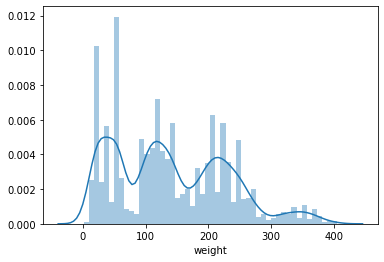

In [22]:
sns.distplot(df['weight'], bins=50)
# I work mostly above 100 weight wise

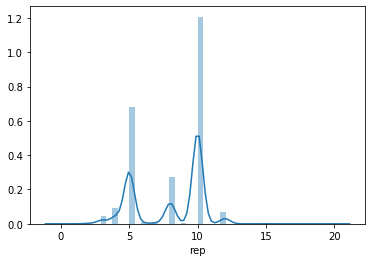

In [23]:
sns.distplot(df['rep'])
# I do most exercises in the 10 rep range

In [5]:
def calc_1rm(weight, rep):
    return weight*(1+(rep/30))

In [6]:
df['1rm'] = df.apply(lambda x: calc_1rm(x.weight, x.rep), axis=1)

In [135]:
df.head()

,date,log_id,exercise_id,exercise_name,set_number,weight,rep,1rm
0,2016-03-04,1,2,Barbell Bench Press,1,150.0,10,200.000000
1,2016-03-04,1,2,Barbell Bench Press,2,150.0,10,200.000000
2,2016-03-04,1,2,Barbell Bench Press,3,150.0,10,200.000000
3,2016-03-04,2,10,Barbell Shoulder Press,1,95.0,10,126.666667
4,2016-03-04,2,10,Barbell Shoulder Press,2,85.0,10,113.333333


In [8]:
df_bench = df[df['exercise_name'] == 'Barbell Bench Press']

In [9]:
df_bench.head()

,date,log_id,exercise_id,exercise_name,set_number,weight,rep,1rm
0,2016-03-04,1,2,Barbell Bench Press,1,150.0,10,200.0
1,2016-03-04,1,2,Barbell Bench Press,2,150.0,10,200.0
2,2016-03-04,1,2,Barbell Bench Press,3,150.0,10,200.0
11,2016-03-07,6,2,Barbell Bench Press,1,150.0,10,200.0
12,2016-03-07,6,2,Barbell Bench Press,2,150.0,10,200.0


In [96]:
series_bench_mean = df_bench.groupby('date')['1rm'].mean()

In [97]:
df_bench_mean = series_bench_mean.to_frame() # Make it a dataframe

In [103]:
df_bench_mean.reset_index(inplace=True) # Need to reset the index

In [104]:
df_bench_mean.head()

,date,1rm
0,2016-03-04,200.000000
1,2016-03-07,195.000000
2,2016-03-09,200.000000
3,2016-03-11,204.533333
4,2016-03-14,209.666667


In [130]:
import matplotlib.dates as mdates
import calendar

In [131]:
df_first_day = df_bench['date'].iloc[0]
datemin = df_first_day.replace(month = 1)

df_last_day = df_bench['date'].iloc[-1]
datemax = df_last_day.replace(month=df_last_day.month, day=calendar.monthrange(df_last_day.year, df_last_day.month)[1])


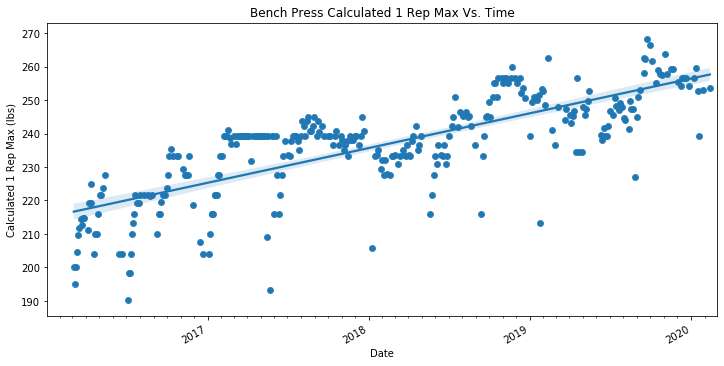

In [150]:
fig, ax = plt.subplots(figsize = (12,6))
sns.scatterplot(df_bench_mean['date'], df_bench_mean['1rm'])

sns.regplot(df_bench_mean['date_ord'], df_bench_mean['1rm']) # Regression Analysis

ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_minor_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y"))
ax.set_xlim(datemin, datemax)

fig.autofmt_xdate()

plt.title('Bench Press Calculated 1 Rep Max Vs. Time')
plt.xlabel('Date')
plt.ylabel('Calculated 1 Rep Max (lbs)');



In [74]:
from matplotlib.dates import date2num

In [110]:
df_bench_mean['date_ord'] = df_bench_mean['date'].apply(lambda x: date2num(x))

In [117]:
df_bench_mean.head()

,date,1rm,date_ord
0,2016-03-04,200.000000,736027.0
1,2016-03-07,195.000000,736030.0
2,2016-03-09,200.000000,736032.0
3,2016-03-11,204.533333,736034.0
4,2016-03-14,209.666667,736037.0


In [141]:
def df_ind_exercise(df, exercise_name):

    """
    Return dataframe containing only the 1rm by date of desired exercise
    Arguments: data frame, name of exercise
    Returns: data frame of specific exercise by date
    """

    df_exercise = df[df['exercise_name'] == exercise_name]

    series_mean = df_exercise.groupby('date')['1rm'].mean()

    df_series = series_mean.to_frame().reset_index()

    df_series['date_ord'] = df_series['date'].apply(lambda x: date2num(x))

    return df_series


In [142]:
df_squat_mean = df_ind_exercise(df, 'Barbell Squat')

In [143]:
df_squat_mean.head()

,date,1rm,date_ord
0,2016-04-20,233.333333,736074.0
1,2016-04-27,239.166667,736081.0
2,2016-05-04,245.000000,736088.0
3,2016-05-11,250.833333,736095.0
4,2016-06-02,236.833333,736117.0


In [151]:
def exercise_plotter(df, exercise_name):
    """
    Plots desired exercise over time

    Arguments: data frame, name of exercise

    Returns: N/A
    """
    df_first_day = df['date'].iloc[0]
    datemin = df_first_day.replace(month = 1)

    df_last_day = df['date'].iloc[-1]
    datemax = df_last_day.replace(month=df_last_day.month, day=calendar.monthrange(df_last_day.year, df_last_day.month)[1])

    fig, ax = plt.subplots(figsize=(12,6))

    sns.scatterplot(df['date'], df['1rm'])
    sns.regplot(df['date_ord'], df['1rm'])

    ax.xaxis.set_major_locator(mdates.YearLocator())
    ax.xaxis.set_minor_locator(mdates.MonthLocator())
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
    ax.set_xlim(datemin, datemax)

    fig.autofmt_xdate()

    plt.title(exercise_name + ' Calculated 1rm vs. Time')
    plt.xlabel('Date (Year)')
    plt.ylabel('Calculated 1 Rep Max (lbs)')

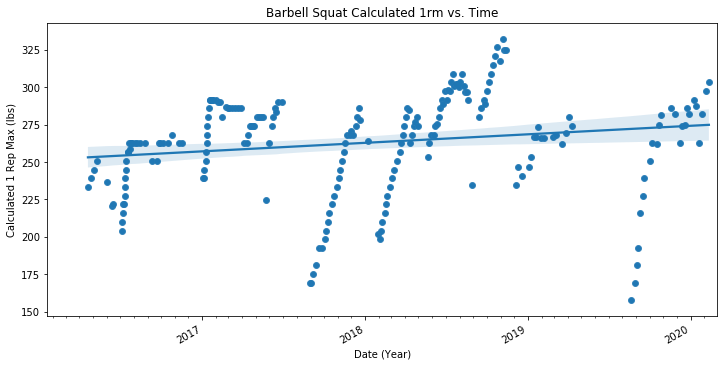

In [152]:
exercise_plotter(df_squat_mean, 'Barbell Squat')

In [147]:
df_deadlift_mean = df_ind_exercise(df, 'Barbell Deadlift')

In [148]:
df_deadlift_mean.head()

,date,1rm,date_ord
0,2016-03-08,246.666667,736031.0
1,2016-03-10,225.000000,736033.0
2,2016-03-12,228.888889,736035.0
3,2016-03-15,231.555556,736038.0
4,2016-03-24,235.555556,736047.0


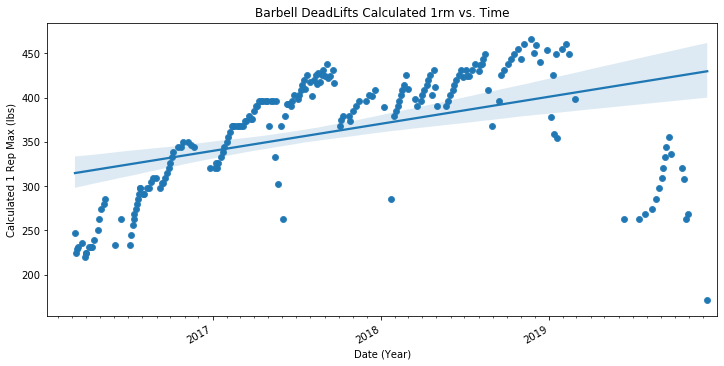

In [153]:
exercise_plotter(df_deadlift_mean, 'Barbell DeadLifts')